### Redes Siameses

O propósito da rede siâmes é simples. Identificar se duas sentenças são duplicadas ou não. Para isso podemos usar o exemplo:

$f_{1}$<b>Quão antigo é esse vinho</b>
$f_{2}$<b>De que ano é esse vinho</b>

As palavras utilizadas são totalmente diferentes e por isso é difícil identificar se essas frases são uma duplicada da outra ou se são duas frases de fato distintas.

A arquitetura da rede siemes usa na verdade 1 único modelo. Esse modelo após ser treinado vai receber de entrada ambas as frases $f_{1}$ e $f_{2}$ e vai dar origem a dois vetores $v_{1}$ e $v_{2}$. Esses vetores são simplesmente comparados utilizando similaridade de cossenos. Claro, para que essa comparação faça sentido, é utilizado um parametro $\tau$ onde se a similaridade de cosseno for menor que $\tau$ consideramos que os vetores não são duplicados.

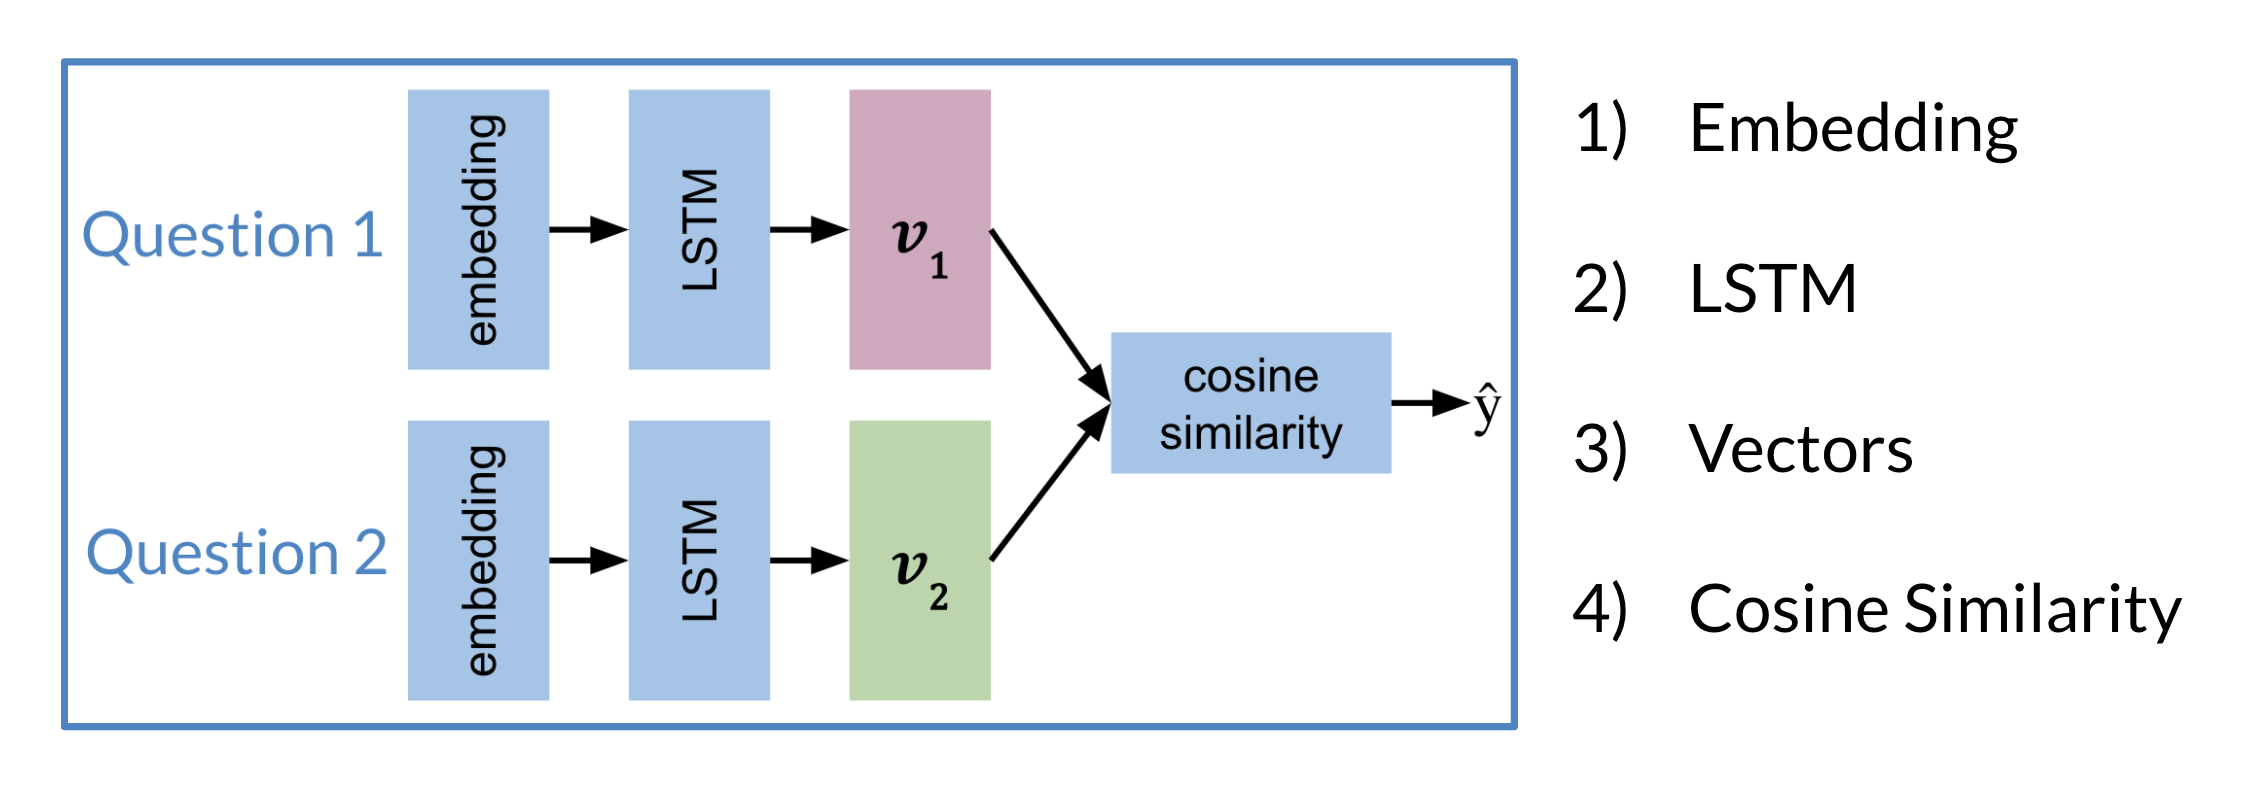

A função de perca usada para o treinamento desse modelo é a triplet loss function. Ela é uma tripla porque relacina três valores. Uma âncora, sendo esta a frase a ser comparada com duas outras frases uma sendo positiva (ou seja similar) e outra sendo negativa (ou seja não similar). A função é definida na forma:

$$Cost=max(-cos(A,P) + cos(A,N) + \alpha, 0)$$

A representa o vetor âncora, P e N representam os vetores positvos e negativos. O $\alpha$ é um hiperparâmetro que controla a distância entre os cossenos. Para melhor performance essa função pode ser otimizada para

$$Cost_{1}=max(-cos(A,P) + closest\_neg + \alpha, 0)$$
$$Cost_{2}=max(-cos(A,P) + mean\_neg + \alpha, 0)$$

Considerando o exemplo abaixo temos:

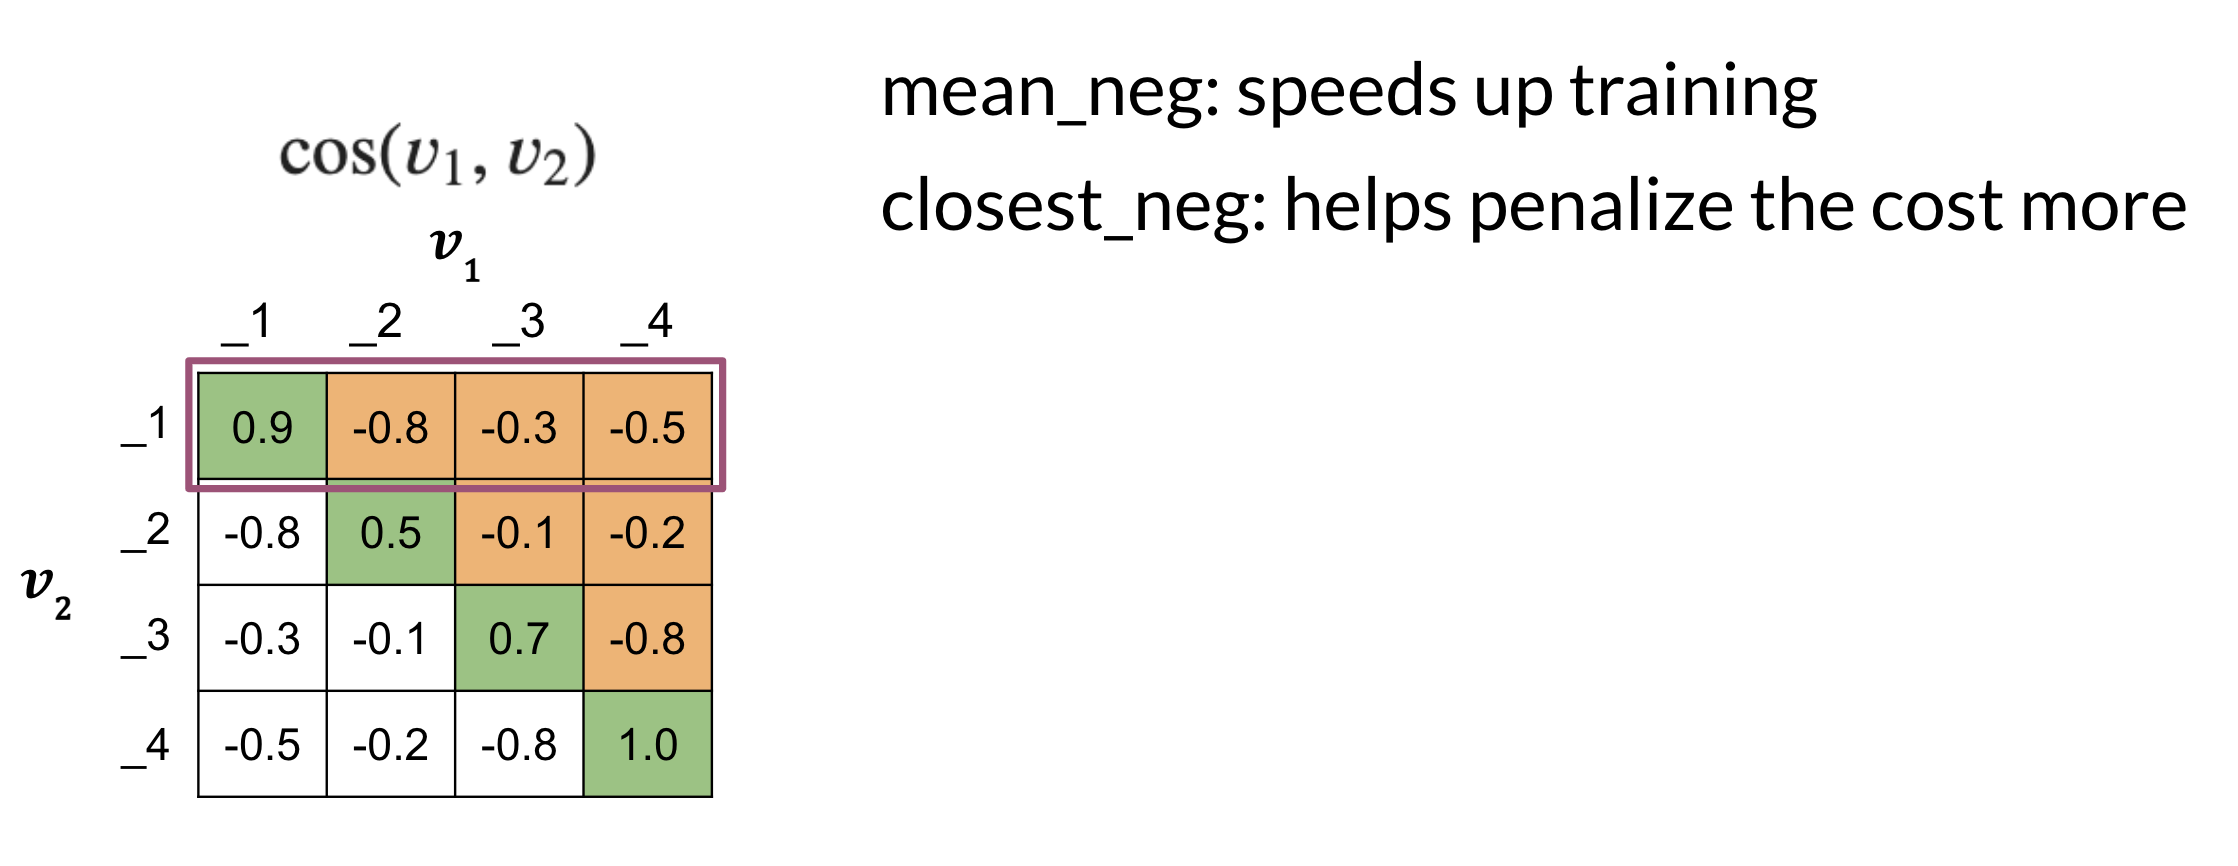

Onde a $closed\_neg$ é uma referência ao exemplo negativo mais próximo do exemplo similar (cujo similaridade está expressa na diagonal principal). (-.3)

Onde a $mean\_neg$ é uma referência a média dos exemplos negativos daquela linha. (-.8 + -.3 + -.5)/3

Dito isto podemos definir um novo custo, com a fórmula:

$$Cost = Cost_{1} + Cost_{2} $$

Assim, penalizamos as triplas difíceis (em que cos(A,P) < cos(A,N)) ajudando na convergência do treino e também generalizamos os exemplos negativos da respectiva batch através da média deles, isso evita ter que computar o custo para cada par de exemplo negativo e âncora.
